# DSO 510 Project Final Model Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
df=pd.read_csv('regression_data.csv')

In [2]:
df.head()

,school,acceptance_rate,average_salary,public_private,reputation_score,alumni,tuition_fees,distance_nearest_city
0,University of Pennsylvania (Wharton),0.0649,80354,1,4.8,99000.0,53534.0,1.560704
1,Washington University in St. Louis (Olin),0.0970,67115,1,4.1,21000.0,51533.0,235.684727
2,University of California-Berkeley (Haas),0.0430,73302,0,4.6,39000.0,42184.0,11.315188
3,Cornell University (Dyson),0.0290,74493,1,4.3,48000.0,52853.0,178.500330
4,University of Michigan (Ross),0.1200,72268,0,4.6,52000.0,32451.5,35.657174


In [3]:
# Descriptive statistics
df.describe().round(3)

,acceptance_rate,average_salary,public_private,reputation_score,alumni,tuition_fees,distance_nearest_city
count,88.000,88.000,88.000,88.000,88.000,88.000,88.000
mean,0.437,58914.818,0.500,3.628,64530.341,34068.636,85.813
std,0.228,8506.707,0.503,0.395,67718.897,13804.430,96.301
min,0.029,34708.000,0.000,2.800,19000.000,10879.500,0.642
25%,0.235,53429.750,0.000,3.300,40000.000,21997.875,5.788
50%,0.438,58430.000,0.500,3.600,48000.000,32215.000,56.436
75%,0.620,63901.500,1.000,3.800,64750.000,48921.000,112.807
max,0.886,80546.000,1.000,4.800,575000.000,53910.000,363.630


## Calculate Variance Inflation Factors

In [4]:
# Create a subset for the independent variables in the model
X=df.iloc[:,[1,3,4,5,6,7]]

In [5]:
# Create VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [6]:
# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                 feature        VIF
0        acceptance_rate   4.571270
1         public_private   7.018867
2       reputation_score  20.031593
3                 alumni   1.984885
4           tuition_fees  27.172796
5  distance_nearest_city   1.949306


## Build Final Regression Model

In [7]:
# Prep the variables for the model 
ln_average_salary=np.log(df['average_salary'])
acceptance_rate=df['acceptance_rate']
public_private=df['public_private']
reputation_score=df['reputation_score']
ln_alumni=np.log(df['alumni'])
tuition_fees=df['tuition_fees']
ln_distance_nearest_city=np.log(df['distance_nearest_city'])

In [8]:
# Final model result
result = sm.ols(formula="ln_average_salary ~ acceptance_rate + public_private + reputation_score +\
                         ln_alumni + tuition_fees + ln_distance_nearest_city + public_private*tuition_fees", 
                data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      ln_average_salary   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     30.82
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           3.05e-20
Time:                        21:36:51   Log-Likelihood:                 102.18
No. Observations:                  88   AIC:                            -188.4
Df Residuals:                      80   BIC:                            -168.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

## Analyze Residuals

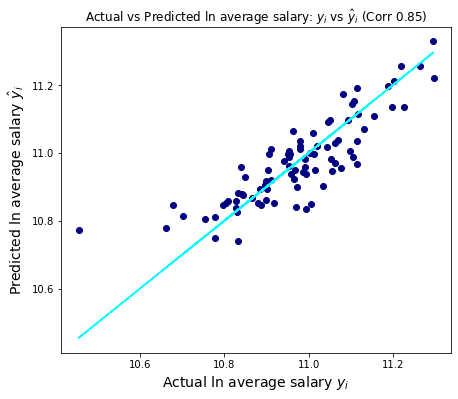

In [9]:
# Plot actual ln average salary vs predicted ln average salary
corr=ln_average_salary.corr(result.fittedvalues).round(2)
plt.rcParams['figure.figsize']=(7,6)
plt.scatter(x=ln_average_salary,y=result.fittedvalues, c = 'navy')
plt.plot(ln_average_salary,ln_average_salary,color='cyan')
plt.xlabel('Actual ln average salary $y _i$', fontsize=14)
plt.ylabel('Predicted ln average salary $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted ln average salary: $y _i$ vs $\hat y_i$ (Corr {corr})');

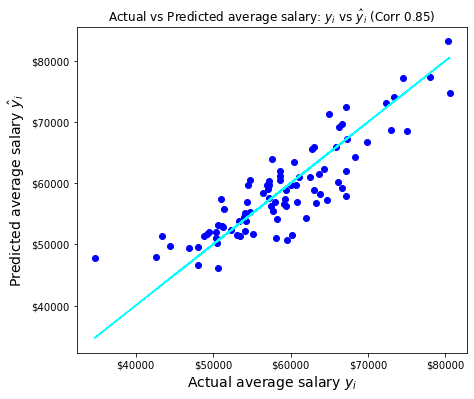

In [10]:
# Plot actual average salary vs predicted average salary
plt.scatter(x=np.e**ln_average_salary,y=np.e**result.fittedvalues, c = 'blue')
plt.plot(np.e**ln_average_salary,np.e**ln_average_salary,color='cyan')
plt.xlabel('Actual average salary $y _i$', fontsize=14)
plt.ylabel('Predicted average salary $\hat y _i$', fontsize=14)
plt.xticks(range(40000, 90000, 10000),[f'${num}' for num in range(40000, 90000, 10000)])
plt.yticks(range(40000, 90000, 10000),[f'${num}' for num in range(40000, 90000, 10000)])
plt.title(f'Actual vs Predicted average salary: $y _i$ vs $\hat y_i$ (Corr {corr})');

In [11]:
# Obtain standardized residuals
influence = result.get_influence()
standardized_residuals = influence.resid_studentized_internal

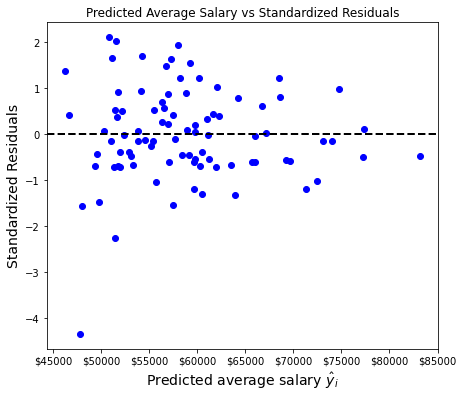

In [12]:
# Plot predicted average salary vs standardized residuals
plt.scatter(x=np.e**result.fittedvalues,y=standardized_residuals, c = 'blue')
plt.xlabel('Predicted average salary $\hat y _i$', fontsize=14)
plt.ylabel('Standardized Residuals',fontsize=14)
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xticks(range(45000, 90000, 5000),[f'${num}' for num in range(45000, 90000, 5000)])
plt.title('Predicted Average Salary vs Standardized Residuals');

In [13]:
# Investigate outlier
outlier=df['average_salary'].min()
df[df['average_salary']==outlier]

,school,acceptance_rate,average_salary,public_private,reputation_score,alumni,tuition_fees,distance_nearest_city
66,Hult International Business School,0.5,34708,1,2.8,48000.0,38584.0,0.984505
